In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
# ! pip install imdbpy
# from imdb import IMDb
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Term_Project_Unsupervised_Learners/data/"
path = "/content/drive/My Drive/Term_Project_Unsupervised_Learners/data/"
f_path = "/content/drive/My Drive/Term_Project_Unsupervised_Learners/feature/"

aggregated_final_clean_actor_director_istopk_logrev.csv     original_data
aggregated_final_clean_actor_director_istopk_logrev.gsheet  preprocessing
aggregated_final_clean_actor_istopk_logrev.csv		    test_2015_2017.csv
aggregated_selected_columns.csv				    train_1980_2012.csv
aggregated_selected_columns_full_revenue.csv		    val_2013_2014.csv


In [ ]:
df=pd.read_csv(path+'aggregated_selected_columns.csv',index_col=None)
df

,id,title,imdb_id,release_date,release_year,runtime,title_length,top5_actors,log_revenue_final,log_budget_final,revenue_new,budget_final,first_company,production_company_class,gender_score,has_oscar_winner,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,popular_genre,collection_name,collection,first_in_collection,sequel,crew,cast
0,862,Toy Story,tt0114709,1995-10-30,1995,81.0,2,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",19.738573,17.216708,373554033.0,30000000.0,Pixar Animation Studios,minor,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Toy Story Collection,1,1,0,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'cast_id': 14, 'character': 'Woody (voice)',..."
1,8844,Jumanji,tt0113497,1995-12-15,1995,104.0,1,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",19.386893,17.989898,262797249.0,65000000.0,TriStar Pictures,medium,0.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0,0,0,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'cast_id': 1, 'character': 'Alan Parrish', '..."
2,31357,Waiting to Exhale,tt0114885,1995-12-22,1995,127.0,2,"['Whitney Houston', 'Angela Bassett', 'Loretta...",18.215526,16.588099,81452156.0,16000000.0,Twentieth Century Fox Film Corporation,major,0.8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,NaN,0,0,0,"[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'cast_id': 1, 'character': ""Savannah 'Vannah..."
3,11862,Father of the Bride Part II,tt0113041,1995-02-10,1995,106.0,4,"['Steve Martin', 'Diane Keaton', 'Martin Short...",18.153832,17.216708,76578911.0,30000000.0,Sandollar Productions,minor,0.4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Father of the Bride Collection,1,0,1,"[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'cast_id': 1, 'character': 'George Banks', '..."
4,949,Heat,tt0113277,1995-12-15,1995,170.0,1,"['Al Pacino', 'Robert De Niro', 'Val Kilmer', ...",19.048952,17.909855,187436818.0,60000000.0,Regency Enterprises,medium,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,NaN,0,0,0,"[{'credit_id': '52fe4292c3a36847f802916d', 'de...","[{'cast_id': 25, 'character': 'Lt. Vincent Han..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5069,429200,Good Time,tt4846232,2017-08-11,2017,99.0,2,"['Robert Pattinson', 'Jennifer Jason Leigh', '...",16.203654,15.319588,10893246.0,4500000.0,Rhea Films,minor,0.2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,NaN,0,0,0,"[{'credit_id': '59209162c3a3687a64049bca', 'de...","[{'cast_id': 2, 'character': 'Connie Nikas', '..."
5070,269795,2:22,tt1131724,2017-06-29,2017,99.0,1,"['Michiel Huisman', 'Teresa Palmer', 'Sam Reid...",15.341567,16.811243,4600000.0,20000000.0,Pandemonium,minor,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,NaN,0,0,0,"[{'credit_id': '5967ccb8c3a36879cb006d0f', 'de...","[{'cast_id': 18, 'character': 'Dylan Branson',..."
5071,353491,The Dark Tower,tt1648190,2017-08-03,2017,95.0,2,"['Idris Elba', 'Matthew McConaughey', 'Tom Tay...",18.078190,17.909855,71000000.0,60000000.0,Imagine Entertainment,medium,0.2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,NaN,0,0,0,"[{'credit_id': '5912cf71c3a36864d40533b7', 'de...","[{'cast_id': 9, 'character': 'Roland Deschain'..."
5072,378236,The Emoji Movie,tt4877122,2017-07-28,2017,86.0,2,"['T.J. Miller', 'James Corden', 'Anna Faris', ...",18.018918,17.727534,66913939.0,50000000.0,Columbia Pictures,major,0.4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0,0,0,"[{'credit_

In [ ]:
old_df = pd.read_csv(path+'aggregated_genre_collection_actor_istopk_logrev.csv',index_col=None)

In [ ]:
df_new = df.set_index('id')

In [ ]:
old_df.loc[old_df['id'] == 429200]

,id,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,top5_actors,log_revenue,usa,log_revenue_num,first_company,production_company_class,gender_score,has_oscar_winner,log_budget,title_length,Action,Adventure,Animation,Comedy,...,logrev_in_2002-01-01_2003-12-31_0,logrev_in_2002-01-01_2003-12-31_1,logrev_in_2002-01-01_2003-12-31_2,logrev_in_2002-01-01_2003-12-31_3,logrev_in_2002-01-01_2003-12-31_4,logrev_in_2004-01-01_2005-12-31_0,logrev_in_2004-01-01_2005-12-31_1,logrev_in_2004-01-01_2005-12-31_2,logrev_in_2004-01-01_2005-12-31_3,logrev_in_2004-01-01_2005-12-31_4,logrev_in_2006-01-01_2007-12-31_0,logrev_in_2006-01-01_2007-12-31_1,logrev_in_2006-01-01_2007-12-31_2,logrev_in_2006-01-01_2007-12-31_3,logrev_in_2006-01-01_2007-12-31_4,logrev_in_2008-01-01_2009-12-31_0,logrev_in_2008-01-01_2009-12-31_1,logrev_in_2008-01-01_2009-12-31_2,logrev_in_2008-01-01_2009-12-31_3,logrev_in_2008-01-01_2009-12-31_4,logrev_in_2010-01-01_2011-12-31_0,logrev_in_2010-01-01_2011-12-31_1,logrev_in_2010-01-01_2011-12-31_2,logrev_in_2010-01-01_2011-12-31_3,logrev_in_2010-01-01_2011-12-31_4,logrev_in_2002-01-01_2006-12-31_0,logrev_in_2002-01-01_2006-12-31_1,logrev_in_2002-01-01_2006-12-31_2,logrev_in_2002-01-01_2006-12-31_3,logrev_in_2002-01-01_2006-12-31_4,logrev_in_2007-01-01_2011-12-31_0,logrev_in_2007-01-01_2011-12-31_1,logrev_in_2007-01-01_2011-12-31_2,logrev_in_2007-01-01_2011-12-31_3,logrev_in_2007-01-01_2011-12-31_4,logrev_in_2002-01-01_2011-12-31_0,logrev_in_2002-01-01_2011-12-31_1,logrev_in_2002-01-01_2011-12-31_2,logrev_in_2002-01-01_2011-12-31_3,logrev_in_2002-01-01_2011-12-31_4
5614,429200,False,NaN,20000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",http://goodtime.movie/,tt4846232,en,Good Time,A bank robber tries to avoid the law closing i...,5.798555,/cz0egudCsfsTzwUAL03A5UzoHGT.jpg,"[{'name': 'Rhea Films', 'id': 37504}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",2017-08-11,10893246.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,Good Time,False,7.3,46.0,"[{'cast_id': 2, 'character': 'Connie Nikas', '...","[{'credit_id': '59209162c3a3687a64049bca', 'de...","['Robert Pattinson', 'Jennifer Jason Leigh', '...",M,True,16.203654,Rhea Films,minor,0.2,0.0,16.811243,2,0.0,0.0,0.0,0.0,...,17.791874,11.074755,17.42587,17.360599,17.421132,17.651282,16.393032,17.281424,17.209644,17.186005,17.431418,17.071542,16.958927,16.865996,16.791195,20.084438,17.285917,17.229866,17.021555,17.097519,19.285698,15.632607,16.649069,16.514355,16.55299,17.498172,13.733894,17.081469,16.9776,16.978994,19.551945,15.632607,16.812532,16.669104,16.710061,19.551945,14.113636,16.847044,16.696161,16.744449


In [ ]:
for id in df_new[pd.isna(df_new['revenue_new'])].index:
    df_new.at[id,'revenue_new'] = old_df.loc[old_df['id'] == id]['revenue']

In [ ]:
df_new['log_revenue_final'] = np.log(df_new['revenue_new'])
df_new[pd.isna(df_new['log_revenue_final'])]

,title,imdb_id,release_date,release_year,runtime,title_length,top5_actors,log_revenue_final,log_budget_final,revenue_new,budget_final,first_company,production_company_class,gender_score,has_oscar_winner,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,popular_genre,collection_name,collection,first_in_collection,sequel,crew,cast
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [ ]:
df_actors = pd.read_csv(path+'aggregated_final_clean_actor_director_istopk_logrev.csv')
new_df = df_new.merge(df_actors.set_index('id')[df_actors.columns[-36:-21]],how='left',left_index=True,right_index=True)

In [ ]:
new_df.head()

,title,imdb_id,release_date,release_year,runtime,title_length,top5_actors,log_revenue_final,log_budget_final,revenue_new,budget_final,first_company,production_company_class,gender_score,has_oscar_winner,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,popular_genre,collection_name,collection,first_in_collection,sequel,crew,cast,actor_is_top_100_of_past_2_years_0,actor_is_top_100_of_past_2_years_1,actor_is_top_100_of_past_2_years_2,actor_is_top_100_of_past_2_years_3,actor_is_top_100_of_past_2_years_4,actor_is_top_100_of_past_5_years_0,actor_is_top_100_of_past_5_years_1,actor_is_top_100_of_past_5_years_2,actor_is_top_100_of_past_5_years_3,actor_is_top_100_of_past_5_years_4,actor_is_top_100_of_past_10_years_0,actor_is_top_100_of_past_10_years_1,actor_is_top_100_of_past_10_years_2,actor_is_top_100_of_past_10_years_3,actor_is_top_100_of_past_10_years_4
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
862,Toy Story,tt0114709,1995-10-30,1995,81.0,2,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",19.738573,17.216708,373554033.0,30000000.0,Pixar Animation Studios,minor,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Toy Story Collection,1,1,0,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'cast_id': 14, 'character': 'Woody (voice)',...",1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
8844,Jumanji,tt0113497,1995-12-15,1995,104.0,1,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",19.386893,17.989898,262797249.0,65000000.0,TriStar Pictures,medium,0.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0,0,0,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'cast_id': 1, 'character': 'Alan Parrish', '...",0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
31357,Waiting to Exhale,tt0114885,1995-12-22,1995,127.0,2,"['Whitney Houston', 'Angela Bassett', 'Loretta...",18.215526,16.588099,81452156.0,16000000.0,Twentieth Century Fox Film Corporation,major,0.8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,NaN,0,0,0,"[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11862,Father of the Bride Part II,tt0113041,1995-02-10,1995,106.0,4,"['Steve Martin', 'Diane Keaton', 'Martin Short...",18.153832,17.216708,76578911.0,30000000.0,Sandollar Productions,minor,0.4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Father of the Bride Collection,1,0,1,"[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'cast_id': 1, 'character': 'George Banks', '...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
949,Heat,tt0113277,1995-12-15,1995,170.0,1,"['Al Pacino', 'Robert De Niro', 'Val Kilmer', ...",19.048952,17.909855,187436818.0,60000000.0,Regency Enterprises,medium,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,NaN,0,0,0,"[{'credit_id': '52fe4292c3a36847f802916d', 'de...","[{'cast_id': 25, 'character': 'Lt. Vincent Han...",0,1,0,0,1,1,1,0,0,0,1,1,0,0,0


In [ ]:
df_final = pd.concat([df_new,pd.get_dummies(df_new['production_company_class'])],axis=1)
df_final

,title,imdb_id,release_date,release_year,runtime,title_length,top5_actors,log_revenue_final,log_budget_final,revenue_new,budget_final,first_company,production_company_class,gender_score,has_oscar_winner,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,popular_genre,collection_name,collection,first_in_collection,sequel,crew,cast,major,medium,minor,other
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
862,Toy Story,tt0114709,1995-10-30,1995,81.0,2,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",19.738573,17.216708,373554033.0,30000000.0,Pixar Animation Studios,minor,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Toy Story Collection,1,1,0,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'cast_id': 14, 'character': 'Woody (voice)',...",0,0,1,0
8844,Jumanji,tt0113497,1995-12-15,1995,104.0,1,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",19.386893,17.989898,262797249.0,65000000.0,TriStar Pictures,medium,0.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0,0,0,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'cast_id': 1, 'character': 'Alan Parrish', '...",0,1,0,0
31357,Waiting to Exhale,tt0114885,1995-12-22,1995,127.0,2,"['Whitney Houston', 'Angela Bassett', 'Loretta...",18.215526,16.588099,81452156.0,16000000.0,Twentieth Century Fox Film Corporation,major,0.8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,NaN,0,0,0,"[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...",1,0,0,0
11862,Father of the Bride Part II,tt0113041,1995-02-10,1995,106.0,4,"['Steve Martin', 'Diane Keaton', 'Martin Short...",18.153832,17.216708,76578911.0,30000000.0,Sandollar Productions,minor,0.4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Father of the Bride Collection,1,0,1,"[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'cast_id': 1, 'character': 'George Banks', '...",0,0,1,0
949,Heat,tt0113277,1995-12-15,1995,170.0,1,"['Al Pacino', 'Robert De Niro', 'Val Kilmer', ...",19.048952,17.909855,187436818.0,60000000.0,Regency Enterprises,medium,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,NaN,0,0,0,"[{'credit_id': '52fe4292c3a36847f802916d', 'de...","[{'cast_id': 25, 'character': 'Lt. Vincent Han...",0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429200,Good Time,tt4846232,2017-08-11,2017,99.0,2,"['Robert Pattinson', 'Jennifer Jason Leigh', '...",16.203654,15.319588,10893246.0,4500000.0,Rhea Films,minor,0.2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,NaN,0,0,0,"[{'credit_id': '59209162c3a3687a64049bca', 'de...","[{'cast_id': 2, 'character': 'Connie Nikas', '...",0,0,1,0
269795,2:22,tt1131724,2017-06-29,2017,99.0,1,"['Michiel Huisman', 'Teresa Palmer', 'Sam Reid...",15.341567,16.811243,4600000.0,20000000.0,Pandemonium,minor,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,NaN,0,0,0,"[{'credit_id': '5967ccb8c3a36879cb006d0f', 'de...","[{'cast_id': 18, 'character': 'Dylan Branson',...",0,0,1,0
353491,The Dark Tower,tt1648190,2017-08-03,2017,95.0,2,"['Idris Elba', 'Matthew McConaughey', 'Tom Tay...",18.078190,17.909855,71000000.0,60000000.0,Imagine Entertainment,medium,0.2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,NaN,0,0,0,"[{'credit_id': '5912cf71c3a36864d40533b7', 'de...","[{'cast_id': 9, 'character': 'Roland Deschain'...",0,1,0,0


In [ ]:
df_use = df_final[columns]

In [ ]:
# fill in missing na in genre columns
for id in df_use[df_use.isna().any(axis=1)].index:
    for f in ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary','Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music','Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']:
        df_final.at[id,f] = 0

In [ ]:
# df_use = df_final[columns]
# df_use[df_use.isna().any(axis=1)]

,log_budget_final,major,medium,minor,gender_score,popular_genre,sequel,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,title_length,runtime,log_revenue_final
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [ ]:
df_final.to_csv(path+'aggregated_selected_columns_full_revenue.csv')

Feature Selection using Forward Stepwise Selection

In [ ]:
df_final = pd.read_csv(path+'aggregated_selected_columns_full_revenue.csv').set_index('id')
actor_df = pd.read_csv(path+'aggregated_final_clean_actor_director_istopk_logrev.csv').set_index('id')
df_final[actor_df.columns[-37:]] = actor_df[actor_df.columns[-37:]]

In [ ]:
df_final.to_csv(path+'aggregated_selected_columns_with_actor_director_istopk_logrev.csv')

In [ ]:
features = ['log_budget_final','major','medium','minor','gender_score','popular_genre','sequel','Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary','Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music','Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western', 'title_length','runtime']

full_features = [f for f in features]
for a in actor_df.columns[-36:]:
    full_features.append(a)

reduced_features_actors = [f for f in features]
for a in actor_df.columns[-6:-3]:
    reduced_features_actors.append(a)
for a in actor_df.columns[-36:-21]:
    reduced_features_actors.append(a)

drop_columns=['Documentary','Western','Foreign','TV Movie','War','History','Music','Animation']
reduced_features = [f for f in reduced_features_actors]
for d in drop_columns:
    reduced_features.remove(d)



In [ ]:
print(reduced_features)

['log_budget_final', 'major', 'medium', 'minor', 'gender_score', 'popular_genre', 'sequel', 'Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Horror', 'Mystery', 'Romance', 'Science Fiction', 'Thriller', 'title_length', 'runtime', 'director_is_top_50_of_past_2_years_0', 'director_is_top_50_of_past_5_years_0', 'director_is_top_50_of_past_10_years_0', 'actor_is_top_100_of_past_2_years_0', 'actor_is_top_100_of_past_2_years_1', 'actor_is_top_100_of_past_2_years_2', 'actor_is_top_100_of_past_2_years_3', 'actor_is_top_100_of_past_2_years_4', 'actor_is_top_100_of_past_5_years_0', 'actor_is_top_100_of_past_5_years_1', 'actor_is_top_100_of_past_5_years_2', 'actor_is_top_100_of_past_5_years_3', 'actor_is_top_100_of_past_5_years_4', 'actor_is_top_100_of_past_10_years_0', 'actor_is_top_100_of_past_10_years_1', 'actor_is_top_100_of_past_10_years_2', 'actor_is_top_100_of_past_10_years_3', 'actor_is_top_100_of_past_10_years_4']


In [ ]:
df_all = df_final[full_features+['log_revenue_final']]

,log_budget_final,major,medium,minor,gender_score,popular_genre,sequel,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,title_length,runtime,actor_is_top_100_of_past_2_years_0,actor_is_top_100_of_past_2_years_1,actor_is_top_100_of_past_2_years_2,actor_is_top_100_of_past_2_years_3,actor_is_top_100_of_past_2_years_4,actor_is_top_100_of_past_5_years_0,actor_is_top_100_of_past_5_years_1,actor_is_top_100_of_past_5_years_2,actor_is_top_100_of_past_5_years_3,actor_is_top_100_of_past_5_years_4,actor_is_top_100_of_past_10_years_0,actor_is_top_100_of_past_10_years_1,actor_is_top_100_of_past_10_years_2,actor_is_top_100_of_past_10_years_3,actor_is_top_100_of_past_10_years_4,actor_logrev_of_past_2_years_0,actor_logrev_of_past_2_years_1,actor_logrev_of_past_2_years_2,actor_logrev_of_past_2_years_3,actor_logrev_of_past_2_years_4,actor_logrev_of_past_5_years_0,actor_logrev_of_past_5_years_1,actor_logrev_of_past_5_years_2,actor_logrev_of_past_5_years_3,actor_logrev_of_past_5_years_4,actor_logrev_of_past_10_years_0,actor_logrev_of_past_10_years_1,actor_logrev_of_past_10_years_2,actor_logrev_of_past_10_years_3,actor_logrev_of_past_10_years_4,director_is_top_50_of_past_2_years_0,director_is_top_50_of_past_5_years_0,director_is_top_50_of_past_10_years_0,director_logrev_of_past_2_years_0,director_logrev_of_past_5_years_0,director_logrev_of_past_10_years_0,log_revenue_final
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
862,17.216708,0,0,1,0.0,0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,81.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,19.630420,19.400115,19.154321,19.738573,19.738573,18.837839,19.400115,19.154321,19.738573,19.738573,18.409613,19.400115,19.154321,17.955464,18.022233,1,0,0,19.738573,19.738573,19.738573,19.738573
8844,17.989898,0,1,0,0.4,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,104.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,19.646049,19.386893,19.306276,19.386893,18.987573,18.302395,19.386893,19.306276,19.386893,18.927515,18.251051,19.386893,19.306276,19.386893,18.927515,1,1,1,17.908829,17.920101,18.245437,19.386893
31357,16.588099,1,0,0,0.8,1,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,127.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,18.215526,16.661017,18.215526,18.215526,17.611421,19.024823,17.033613,18.215526,18.215526,17.126720,19.024823,17.033613,18.215526,18.215526,16.792996,1,0,0,18.215526,18.215526,18.215526,18.215526
11862,17.216708,0,0,1,0.4,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,106.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,18.153832,17.196435,16.986199,18.153832,18.153832,18.230816,17.858613,16.983572,18.230816,18.230816,17.908597,17.676268,17.087139,18.230816,18.230816,1,1,0,18.047813,18.134476,18.134476,18.153832
949,17.909855,0,1,0,0.0,1,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,170.0,0,1,1,0,1,1,1,0,0,1,1,1,1,0,1,18.231107,17.377851,18.844330,19.048952,17.178624,17.834989,17.254228,18.471762,19.048952,17.249052,17.911541,17.288269,18.260509,17.467937,17.200770,1,1,0,19.048952,18.594337,17.719459,19.048952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429200,15.319588,0,0,1,0.2,1,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,99.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.083969,16.872096,16.203654,16.203654,16.203654,17.567890,16.872096,16.203654,16.203654,16.203654,18.890593,16.562224,16.203654,16.203654,16.203654,0,0,0,16.203654,16.203654,13.071447,16.203654
269795,16.811243,0,0,1,0.2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,99.

In [ ]:
train = df_final.loc[df_final['release_year']>=1990].loc[df_final['release_year']<= 2014]
# test = df_final.loc[new_df['release_year']>2012].loc[df_final['release_year']<= 2014]
X_train = train[full_features]
y_train = train['log_revenue_final']
# X_test = test[features]
# y_test = test['log_revenue_final']

In [ ]:
X_train.describe()

,log_budget_final,major,medium,minor,gender_score,popular_genre,sequel,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,title_length,runtime,actor_is_top_100_of_past_2_years_0,actor_is_top_100_of_past_2_years_1,actor_is_top_100_of_past_2_years_2,actor_is_top_100_of_past_2_years_3,actor_is_top_100_of_past_2_years_4,actor_is_top_100_of_past_5_years_0,actor_is_top_100_of_past_5_years_1,actor_is_top_100_of_past_5_years_2,actor_is_top_100_of_past_5_years_3,actor_is_top_100_of_past_5_years_4,actor_is_top_100_of_past_10_years_0,actor_is_top_100_of_past_10_years_1,actor_is_top_100_of_past_10_years_2,actor_is_top_100_of_past_10_years_3,actor_is_top_100_of_past_10_years_4,actor_logrev_of_past_2_years_0,actor_logrev_of_past_2_years_1,actor_logrev_of_past_2_years_2,actor_logrev_of_past_2_years_3,actor_logrev_of_past_2_years_4,actor_logrev_of_past_5_years_0,actor_logrev_of_past_5_years_1,actor_logrev_of_past_5_years_2,actor_logrev_of_past_5_years_3,actor_logrev_of_past_5_years_4,actor_logrev_of_past_10_years_0,actor_logrev_of_past_10_years_1,actor_logrev_of_past_10_years_2,actor_logrev_of_past_10_years_3,actor_logrev_of_past_10_years_4,director_is_top_50_of_past_2_years_0,director_is_top_50_of_past_5_years_0,director_is_top_50_of_past_10_years_0,director_logrev_of_past_2_years_0,director_logrev_of_past_5_years_0,director_logrev_of_past_10_years_0
count,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000
mean,16.837690,0.300104,0.306889,0.361691,0.319050,0.566023,0.104123,0.242954,0.156837,0.052714,0.378653,0.161795,0.032881,0.465031,0.111952,0.091075,0.001305,0.023747,0.099165,0.032620,0.083768,0.191284,0.108038,0.000261,0.287578,0.020355,0.009134,2.172234,106.173278,0.358038,0.256002,0.159186,0.115084,0.079854,0.358299,0.221294,0.134395,0.082985,0.054280,0.339770,0.186587,0.103862,0.067850,0.044102,16.897563,16.721038,16.649090,16.592364,16.593505,16.963183,16.725129,16.648920,16.578832,16.557926,16.955582,16.735352,16.660171,16.579288,16.545379,0.236952,0.191284,0.163361,16.670424,16.661724,16.633649
std,1.306759,0.458363,0.461263,0.480553,0.201618,0.495686,0.305460,0.428924,0.363695,0.223491,0.485115,0.368311,0.178348,0.498841,0.315349,0.287754,0.036103,0.152281,0.298922,0.177663,0.277076,0.393363,0.310468,0.016154,0.452692,0.141230,0.095145,1.268077,18.231271,0.479486,0.436480,0.365897,0.319164,0.271102,0.479563,0.415172,0.341120,0.275896,0.226598,0.473693,0.389630,0.305122,0.251521,0.205349,2.074714,2.134494,2.213344,2.318225,2.330481,1.914930,1.982099,2.059953,2.203728,2.228135,1.785409,1.875046,1.940482,2.076506,2.126174,0.425268,0.393363,0.369743,2.508642,2.423635,2.346464
min,5.384495,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.094345,3.401197,1.098612,1.098612,1.098612,4.094345,3.401197,1.098612,1.098612,1.098612,4.094345,3.401197,1.098612,3.401197,1.098612,0.0000

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [ ]:
def runXVal(cv, X_sub, Y_tr,r2=True):
    '''
    Runs Linear Regression cross validation, returns mean of R^2 and standard error of mean
    '''
    score = []; 
    for train_index, test_index in cv.split(X_sub):
        X_tr_f = X_sub.iloc[train_index]
        X_va_f = X_sub.iloc[test_index]
        Y_tr_f = Y_tr.iloc[train_index]
        Y_va_f = Y_tr.iloc[test_index]

        lr = linear_model.LinearRegression()
        lr.fit(X_tr_f, Y_tr_f)
        if r2:
            score.append(lr.score(X_va_f,Y_va_f))
        else:
            score.append(mean_squared_error(Y_va_f,lr.predict(X_va_f)))
    return [np.array(score).mean(), np.array(score).std()/np.sqrt(len(score))]
        

In [ ]:
def LrForward(X_tr, Y_tr, cv, features,r2):
    '''
    Runs cross-validated stepwise selection
    Does not pick the best features, but returns data
    Returns a dictionary that shows at each k: [feature set], x-validated mean, x-validated var 
    For each loop, chooses the feature with best mean - 1stderr / best mean + 1stderr
    '''
    results = {}
    curr_best = set([])
    cand_list = set(features)
    k = 1
    while (len(cand_list)>0):
        if r2:
            best_mu = -10e+20
            best_serr = 10**10
        else: 
            best_mu = 10**10
            best_serr = 10**10 
        for f in cand_list:
            use_x = list(curr_best)+[f]
            mu, serr = runXVal(cv, X_tr[use_x], Y_tr,r2)
            if r2: 
                # print(serr)
                if ((mu - serr) > (best_mu - best_serr)):
                    best_mu = mu
                    best_serr = serr
                    best_f = f
            else:
                if ((mu+serr) < (best_mu + best_serr)):
                    best_mu = mu
                    best_serr = serr
                    best_f = f
        curr_best.add(best_f) #Add the best feature to the curr_best_set
        cand_list = cand_list.difference(curr_best) #Remove the best feature from the candidate set
        results[k] = [list(curr_best), best_f, best_mu, best_serr]
        k+=1
        
    return results

In [ ]:
#Run the forward selection, full features, R2
cv = KFold(n_splits=10,shuffle=True)
r = LrForward(X_train, y_train, cv,full_features,r2=True)
mse = LrForward(X_train, y_train, cv,full_features,r2=False)

KeyboardInterrupt: ignored

In [ ]:
#Run the forward selection, only is_top 100 actors/director features
cv = KFold(n_splits=5,shuffle=True)
r1 = LrForward(X_train, y_train, cv,reduced_features_actors,r2=True)
mse1 = LrForward(X_train, y_train, cv,reduced_features_actors,r2=False)

In [ ]:
#Run the forward selection, only is top 100 actors/director features and drop uncommon genre features
cv = KFold(n_splits=5,shuffle=True)
r2 = LrForward(X_train, y_train, cv,reduced_features,r2=True)
mse2 = LrForward(X_train, y_train, cv,reduced_features,r2=False)

In [ ]:
best_f_r2 = []
for key in r2.keys():
    best_f_r2.append(r2[key][1])

np.savetxt(f_path+'feature_ranking_r2_5fold_cv.txt', best_f_r2, delimiter="\n", fmt="%s")

In [ ]:
best_f_mse = []
for key in mse2.keys():
    best_f_mse.append(mse2[key][1])
np.savetxt(f_path+'feature_ranking_mse_5fold_cv.txt', best_f_mse, delimiter="\n", fmt="%s")

In [ ]:
def plotResults(r,label,cut,r2=True,cv='5Fold',savefig=True):
    plt.figure(figsize=(10,8))
    ks = []; mus = []; serrs = [];
    for i in range(len(r.keys())-cut):
        ks.append(i+1)
        mus.append(r[i+1][2])
        serrs.append(r[i+1][3])

    if r2:
        best_1serr = max(np.array(mus) - np.array(serrs))
    else: 
        best_1serr = min(np.array(mus) + np.array(serrs))
    plt.clf()
    plt.plot(ks, mus, 'b.-', label = f'{label} of Set k')
    plt.plot(ks, np.array(mus) + np.array(serrs), 'k+-')
    plt.plot(ks, np.array(mus) - np.array(serrs), 'k--')
    # plt.plot(ks, np.ones(len(ks))*best_1serr, 'r', label =f'1 std err rule {best_1serr.round(3)}')


    plt.title('Stepwise Forward Feature Selection')
    plt.xlabel('Greedily Selected Subset of Size k') 
    plt.ylabel(f'{cv} X Validated {label}')
        
    plt.legend()
    if savefig:
        plt.savefig(f_path+f'feature_selection_{label}_{cv}.png')
    plt.show()
   

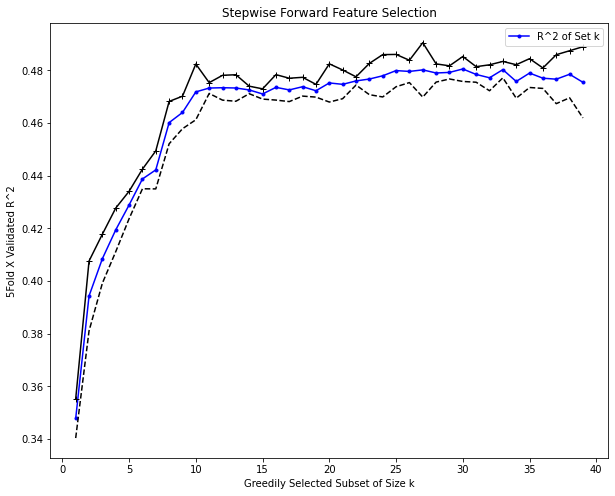

In [ ]:
#Now plot the incremental results
plotResults(r2,'R^2',0,True,savefig=True)


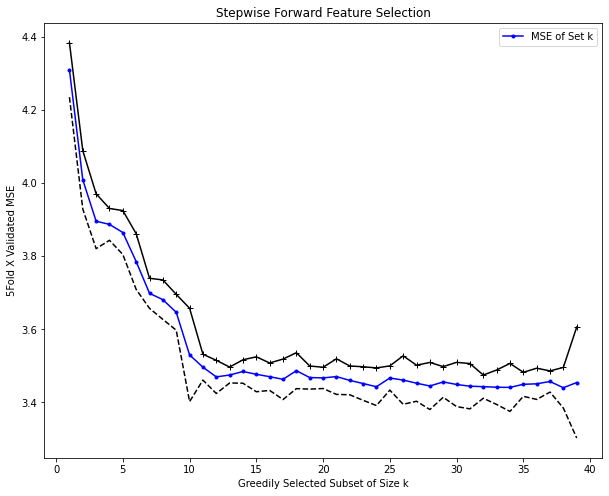

In [ ]:
#Now plot the incremental results
plotResults(mse2,'MSE',0,False,savefig=True)